In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('modified_data7.csv', encoding='cp1252')


In [3]:
data

,position,positionStringShort,name,positionRow,isCaptain,rating,fantasyScore,minutesPlayed,isGoalkeeper,goal,...,duels_won,duels_lost,ground_duels_won_rate(%),aerial_duels_won_rate(%),was_fouled,fouls_commited,dribble_success_rate(%),penalties_won,big_chances_missed,crosses_success_rate(%)
0,Keeper,GK,James Trafford,0,False,6.5,2,90,True,0,...,0,0,0,0,0,0,0,0,0,0
1,Defender,RB,Connor Roberts,1,False,5.9,1,90,False,0,...,3,1,67,100,0,1,0,0,0,0
2,Defender,CB,Ameen Al Dakhil,1,False,5.6,1,90,False,0,...,5,6,50,40,1,1,0,0,0,0
3,Defender,CB,Dara O'Shea,1,False,5.8,1,90,False,0,...,3,2,100,50,1,0,0,0,0,0
4,Defender,CB,Jordan Beyer,1,False,6.9,1,74,False,0,...,5,2,67,100,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,Defender,LB,Emerson Royal,1,False,6.5,0,90,False,0,...,6,9,42,33,1,1,100,0,0,0
10864,Defender,CB,Ben Davies,1,False,6.8,1,90,False,0,...,6,1,100,50,2,0,0,0,0,0
10865,Defender,CB,Eric Dier,1,False,6.3,1,90,False,0,...,4,2,100,50,0,0,0,0,0,0
10866,Defender,RB,Pedro Porro,1,False,7.7,4 + 1,90,False,0,...,8,7,53,0,2,2,100,0,0,33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   position                        10868 non-null  object 
 1   positionStringShort             10852 non-null  object 
 2   name                            10868 non-null  object 
 3   positionRow                     10868 non-null  int64  
 4   isCaptain                       10868 non-null  bool   
 5   rating                          10858 non-null  float64
 6   fantasyScore                    10868 non-null  object 
 7   minutesPlayed                   10868 non-null  int64  
 8   isGoalkeeper                    10868 non-null  bool   
 9   goal                            10868 non-null  int64  
 10  assist                          10868 non-null  int64  
 11  subbedOutTime                   3879 non-null   float64
 12  yellowCard                      

In [5]:
data.describe()

,positionRow,rating,minutesPlayed,goal,assist,subbedOutTime,yellowCard,redCard,total_shots,accurate_passes_rate(%),...,duels_won,duels_lost,ground_duels_won_rate(%),aerial_duels_won_rate(%),was_fouled,fouls_commited,dribble_success_rate(%),penalties_won,big_chances_missed,crosses_success_rate(%)
count,10868.000000,10858.000000,10868.000000,10868.000000,10868.000000,3879.000000,10868.000000,10868.000000,10868.000000,10868.000000,...,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.00000,10868.000000,10868.000000,10868.000000
mean,2.395749,7.013271,83.245583,0.108576,0.078119,71.624903,0.152466,0.002392,1.012606,78.774844,...,3.980769,3.925929,45.331892,35.558520,0.841093,0.869985,28.84689,0.008649,0.100662,10.450497
std,1.644399,0.836941,12.490937,0.351662,0.292333,14.227769,0.359488,0.048855,1.329261,12.760163,...,2.830427,2.922221,28.789542,38.616456,1.084562,1.021589,39.67637,0.092603,0.349035,24.172078
min,0.000000,2.600000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,6.500000,81.000000,0.000000,0.000000,63.000000,0.000000,0.000000,0.000000,72.000000,...,2.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,7.000000,90.000000,0.000000,0.000000,74.000000,0.000000,0.000000,1.000000,81.000000,...,4.000000,4.000000,50.000000,25.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,4.000000,7.600000,90.000000,0.000000,0.000000,82.000000,0.000000,0.000000,2.000000,88.000000,...,6.000000,6.000000,67.000000,67.000000,1.000000,1.000000,50.00000,0.000000,0.000000,0.000000
max,5.000000,9.800000,90.000000,3.000000,4.000000,90.000000,1.000000,1.000000,11.000000,100.000000,...,18.000000,19.000000,100.000000,100.000000,8.000000,8.000000,100.00000,1.000000,5.000000,100.000000


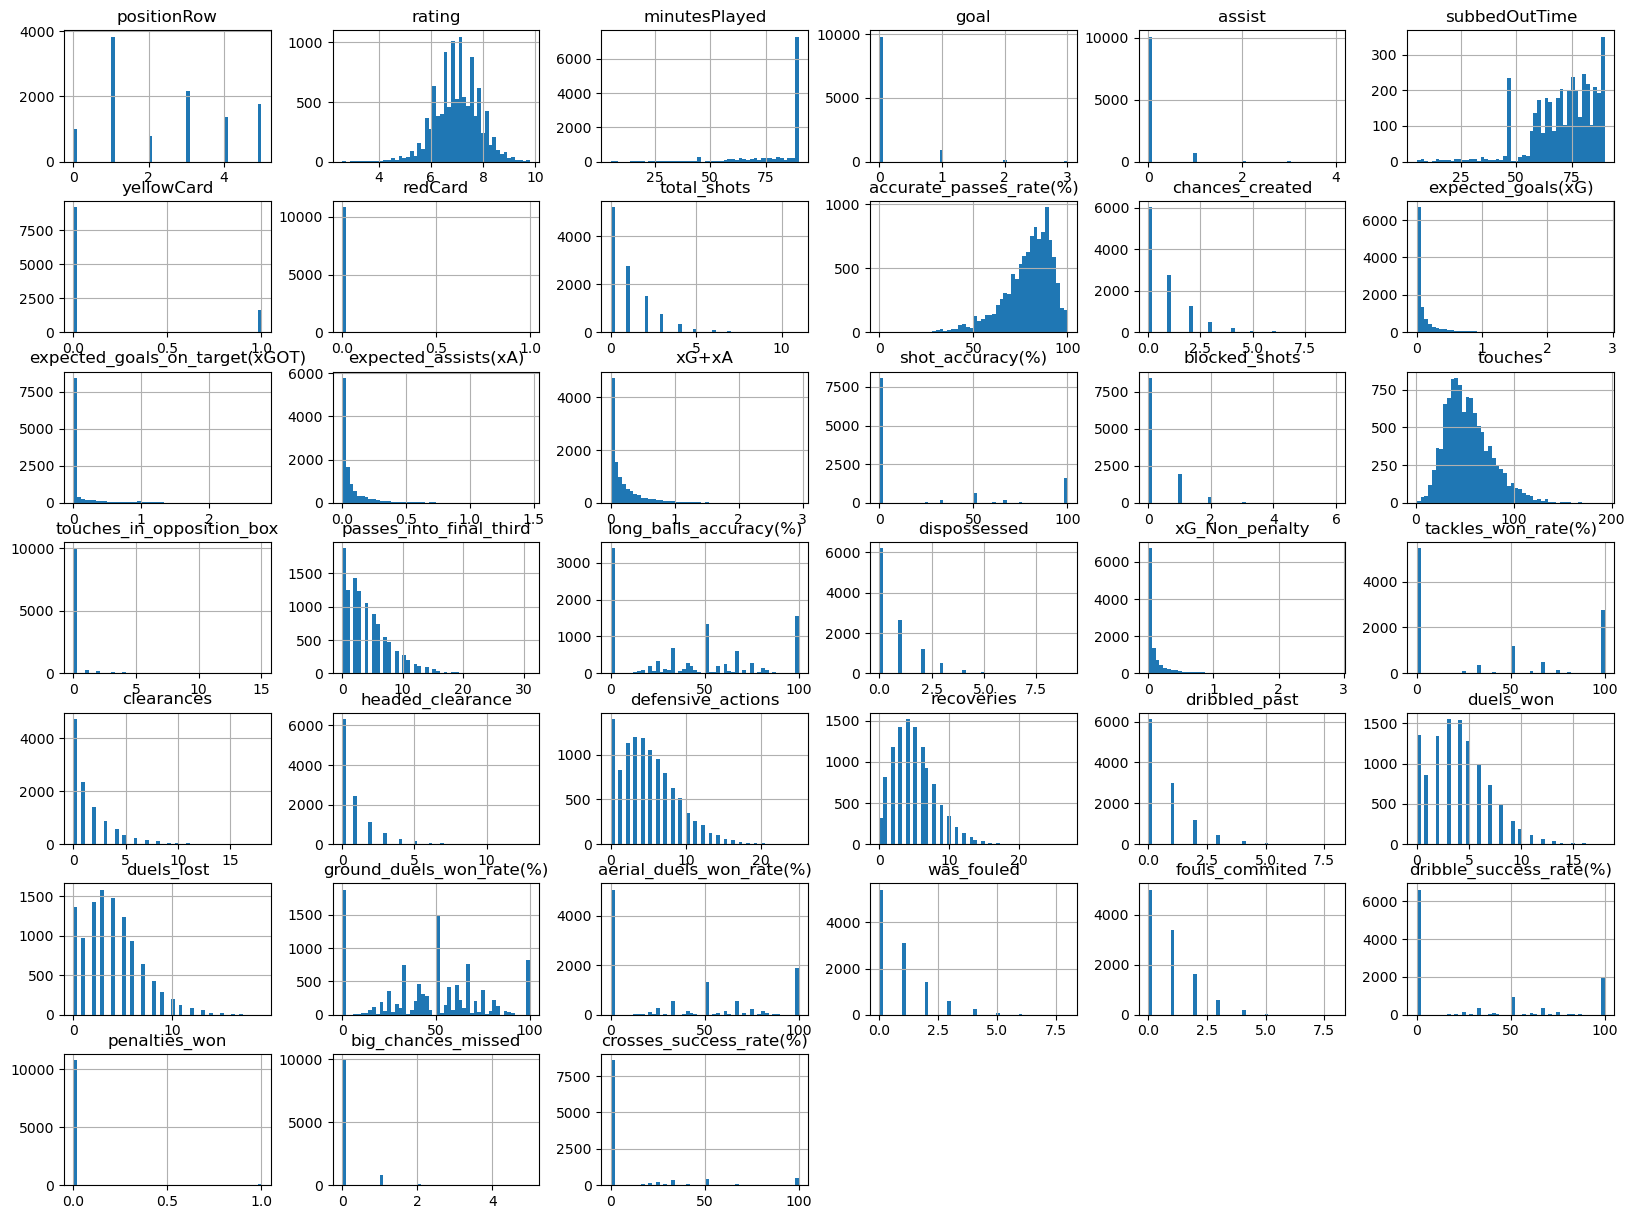

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
data.corr()

,positionRow,isCaptain,rating,minutesPlayed,isGoalkeeper,goal,assist,subbedOutTime,yellowCard,redCard,...,duels_won,duels_lost,ground_duels_won_rate(%),aerial_duels_won_rate(%),was_fouled,fouls_commited,dribble_success_rate(%),penalties_won,big_chances_missed,crosses_success_rate(%)
positionRow,1.000000,-0.078125,0.100725,-0.263812,-0.460738,0.273391,0.141850,0.060898,-0.021133,-0.002622,...,0.195867,0.503026,0.082212,-0.062739,0.303262,0.175246,0.233771,0.078439,0.250924,0.088750
isCaptain,-0.078125,1.000000,0.045300,0.073802,-0.011757,0.000048,0.000058,0.001477,0.008756,-0.002339,...,-0.016087,-0.065596,0.009119,0.046098,-0.042402,-0.011902,-0.022629,0.008586,-0.035036,0.023036
rating,0.100725,0.045300,1.000000,0.237597,-0.111658,0.453064,0.335068,0.377555,-0.007342,-0.087323,...,0.341597,-0.005311,0.273448,0.125596,0.168751,-0.025284,0.230195,0.084165,0.083545,0.121264
minutesPlayed,-0.263812,0.073802,0.237597,1.000000,0.158809,0.024243,0.029649,0.999657,0.035414,-0.128987,...,0.176584,0.050796,0.048237,0.098219,0.042876,0.037997,0.002290,0.007312,0.005685,0.012687
isGoalkeeper,-0.460738,-0.011757,-0.111658,0.158809,1.000000,-0.097640,-0.081224,-0.077639,-0.071797,-0.008934,...,-0.444770,-0.424864,-0.497954,-0.291200,-0.245250,-0.269312,-0.229925,-0.029538,-0.091205,-0.136723
goal,0.273391,0.000048,0.453064,0.024243,-0.097640,1.000000,0.054441,0.139901,-0.019588,-0.009764,...,0.057569,0.140267,0.004366,-0.018337,0.085775,0.032894,0.067309,0.067237,0.120118,0.026170
assist,0.141850,0.000058,0.335068,0.029649,-0.081224,0.054441,1.000000,0.122755,-0.023155,-0.006644,...,0.058090,0.093920,0.027130,-0.020576,0.076598,0.006589,0.069111,0.012431,0.065419,0.139948
subbedOutTime,0.060898,0.001477,0.377555,0.999657,-0.077639,0.139901,0.122755,1.000000,0.038812,NaN,...,0.334625,0.294644,0.126526,0.082143,0.184692,0.161307,0.137924,0.038875,0.079305,0.084722
yellowCard,-0.021133,0.008756,-0.007342,0.035414,-0.071797,-0.019588,-0.023155,0.038812,1.000000,-0.020770,...,0.081202,0.121650,-0.016137,0.027824,0.057662,0.291772,0.043799,0.012904,-0.021120,0.007387
redCard,-0.002622,-0.002339,-0.087323,-0.128987,-0.008934,-0.009764,-0.006644,NaN,-0.020770,1.000000,...,-0.016304,-0.003271,-0.010771,-0.002611,-0.003245,0.020983,-0.004321,-0.004574,0.012859,-0.019225


In [8]:
# 상관관계 계산
corr_matrix = data.corr()

# 상관관계 행렬을 높은 순으로 정렬
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# 자기 자신과의 상관관계 제거 및 중복 페어 제거
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs = corr_pairs[~corr_pairs.index.duplicated(keep='first')]

# 상위 5개 상관관계 페어 출력
print(corr_pairs.head(15))

'''
subbedOutTime                   minutesPlayed                     0.999657
minutesPlayed                   subbedOutTime                     0.999657
expected_goals(xG)              xG_Non_penalty                    0.930753
xG_Non_penalty                  expected_goals(xG)                0.930753
xG+xA                           expected_goals(xG)                0.894014
expected_goals(xG)              xG+xA                             0.894014

이것들 날리기?
일단 subbedOutTime부터 날린다
'''

subbedOutTime                   minutesPlayed                     0.999657
minutesPlayed                   subbedOutTime                     0.999657
expected_goals(xG)              xG_Non_penalty                    0.930753
xG_Non_penalty                  expected_goals(xG)                0.930753
xG+xA                           expected_goals(xG)                0.894014
expected_goals(xG)              xG+xA                             0.894014
clearances                      headed_clearance                  0.857149
headed_clearance                clearances                        0.857149
xG+xA                           xG_Non_penalty                    0.836940
xG_Non_penalty                  xG+xA                             0.836940
expected_goals(xG)              expected_goals_on_target(xGOT)    0.777855
expected_goals_on_target(xGOT)  expected_goals(xG)                0.777855
goal                            expected_goals_on_target(xGOT)    0.756762
expected_goals_on_target(

'\nsubbedOutTime                   minutesPlayed                     0.999657\nminutesPlayed                   subbedOutTime                     0.999657\nexpected_goals(xG)              xG_Non_penalty                    0.930753\nxG_Non_penalty                  expected_goals(xG)                0.930753\nxG+xA                           expected_goals(xG)                0.894014\nexpected_goals(xG)              xG+xA                             0.894014\n\n이것들 날리기?\n일단 subbedOutTime부터 날린다\n'

In [9]:
corr_matrix["rating"].sort_values(ascending=False)

rating                            1.000000
goal                              0.453064
xG+xA                             0.410061
subbedOutTime                     0.377555
expected_goals_on_target(xGOT)    0.377483
chances_created                   0.369483
duels_won                         0.341597
assist                            0.335068
expected_goals(xG)                0.324917
total_shots                       0.310222
touches                           0.310184
xG_Non_penalty                    0.309585
expected_assists(xA)              0.309471
shot_accuracy(%)                  0.291259
ground_duels_won_rate(%)          0.273448
minutesPlayed                     0.237597
recoveries                        0.230535
dribble_success_rate(%)           0.230195
passes_into_final_third           0.201724
was_fouled                        0.168751
tackles_won_rate(%)               0.165554
defensive_actions                 0.148445
long_balls_accuracy(%)            0.127132
aerial_duel

In [10]:
# 필요없는 피처 날리기
data = data.drop("subbedOutTime", axis=1)
data =data.drop("position", axis=1)
data =data.drop("fantasyScore", axis=1)


In [11]:
# 포지션만 있고 세부 포지션 널값처리

# 'positionStringShort'의 널값이 있는 행 찾기
null_positions = data[data['positionStringShort'].isna()]

# 각 널값에 대해 처리
for index, row in null_positions.iterrows():
    # 현재 널값이 있는 행의 'name' 가져오기
    name = row['name']
    
    # 해당 'name'을 가진 모든 행에서 'positionStringShort'의 최빈값 찾기
    most_frequent_position = data[data['name'] == name]['positionStringShort'].mode()[0]

    # 널값 채우기
    data.at[index, 'positionStringShort'] = most_frequent_position
data =data.drop("name", axis=1)

In [12]:
data.info()
#positionStringShort, positionRow 은 카테고리컬 데이터
# name은 학습에 의미가 없을 것 같다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   positionStringShort             10868 non-null  object 
 1   positionRow                     10868 non-null  int64  
 2   isCaptain                       10868 non-null  bool   
 3   rating                          10858 non-null  float64
 4   minutesPlayed                   10868 non-null  int64  
 5   isGoalkeeper                    10868 non-null  bool   
 6   goal                            10868 non-null  int64  
 7   assist                          10868 non-null  int64  
 8   yellowCard                      10868 non-null  int64  
 9   redCard                         10868 non-null  int64  
 10  total_shots                     10868 non-null  int64  
 11  accurate_passes_rate(%)         10868 non-null  int64  
 12  chances_created                 

In [13]:
# rating 널값 제거, 개수가 매우적어 없는거만 제거
data = data.dropna(subset=["rating"])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 10867
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   positionStringShort             10858 non-null  object 
 1   positionRow                     10858 non-null  int64  
 2   isCaptain                       10858 non-null  bool   
 3   rating                          10858 non-null  float64
 4   minutesPlayed                   10858 non-null  int64  
 5   isGoalkeeper                    10858 non-null  bool   
 6   goal                            10858 non-null  int64  
 7   assist                          10858 non-null  int64  
 8   yellowCard                      10858 non-null  int64  
 9   redCard                         10858 non-null  int64  
 10  total_shots                     10858 non-null  int64  
 11  accurate_passes_rate(%)         10858 non-null  int64  
 12  chances_created                 

In [15]:

# x , y 나누기
data_x = data.drop("rating", axis=1)
data_y = data["rating"]

#학습, 테스트 데이터 나누기
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size = 0.2)



#여기에 훈련, 테스트 데이터 나누는 코드 추가하기

# 'positionStringShort'와 'positionRow' 열 선택
x_train_cat = x_train[['positionStringShort', 'positionRow']].values

# OneHotEncoder 객체 생성
cat_encoder = OneHotEncoder()

# 원-핫 인코딩 적용
x_train_cat_1hot = cat_encoder.fit_transform(x_train_cat)
x_train_cat_1hot

<8686x18 sparse matrix of type '<class 'numpy.float64'>'
	with 17372 stored elements in Compressed Sparse Row format>

In [16]:
# x_train_cat.info()


In [17]:
#positionStringShort, positionRow은 카테고리컬
x_train_num = x_train.drop(["positionStringShort", "positionRow"],axis=1)

In [18]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8686 entries, 7474 to 5002
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   isCaptain                       8686 non-null   bool   
 1   minutesPlayed                   8686 non-null   int64  
 2   isGoalkeeper                    8686 non-null   bool   
 3   goal                            8686 non-null   int64  
 4   assist                          8686 non-null   int64  
 5   yellowCard                      8686 non-null   int64  
 6   redCard                         8686 non-null   int64  
 7   total_shots                     8686 non-null   int64  
 8   accurate_passes_rate(%)         8686 non-null   int64  
 9   chances_created                 8686 non-null   int64  
 10  expected_goals(xG)              8686 non-null   float64
 11  expected_goals_on_target(xGOT)  8686 non-null   float64
 12  expected_assists(xA)           

In [19]:
# 불리언 타입이 아닌 수치형 데이터만 선택
numeric_features = x_train_num.select_dtypes(include=['int64', 'float64'])

# StandardScaler 객체 생성
scaler = StandardScaler()

# 수치형 데이터에 표준화 적용
numeric_features_scaled = scaler.fit_transform(numeric_features)

# 스케일링된 데이터를 데이터프레임으로 변환 (원본 데이터프레임의 인덱스 사용)
numeric_features_scaled_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns, index=x_train_num.index)

# 데이터를 소수점 셋째 자리에서 반올림
numeric_features_scaled_df = numeric_features_scaled_df.round(3)

# 스케일링된 수치형 데이터프레임을 원본 데이터프레임과 병합
data_num_scaled = x_train_num.copy()
data_num_scaled[numeric_features.columns] = numeric_features_scaled_df


In [20]:
data_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8686 entries, 7474 to 5002
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   isCaptain                       8686 non-null   bool   
 1   minutesPlayed                   8686 non-null   float64
 2   isGoalkeeper                    8686 non-null   bool   
 3   goal                            8686 non-null   float64
 4   assist                          8686 non-null   float64
 5   yellowCard                      8686 non-null   float64
 6   redCard                         8686 non-null   float64
 7   total_shots                     8686 non-null   float64
 8   accurate_passes_rate(%)         8686 non-null   float64
 9   chances_created                 8686 non-null   float64
 10  expected_goals(xG)              8686 non-null   float64
 11  expected_goals_on_target(xGOT)  8686 non-null   float64
 12  expected_assists(xA)           

In [21]:
data_num_scaled.describe()

,minutesPlayed,goal,assist,yellowCard,redCard,total_shots,accurate_passes_rate(%),chances_created,expected_goals(xG),expected_goals_on_target(xGOT),...,duels_won,duels_lost,ground_duels_won_rate(%),aerial_duels_won_rate(%),was_fouled,fouls_commited,dribble_success_rate(%),penalties_won,big_chances_missed,crosses_success_rate(%)
count,8686.000000,8686.000000,8686.000000,8686.000000,8686.00000,8686.000000,8686.000000,8686.000000,8686.000000,8686.000000,...,8686.000000,8686.000000,8686.000000,8686.000000,8686.000000,8686.000000,8686.00000,8686.000000,8686.000000,8686.000000
mean,0.000085,0.000433,-0.000047,0.000393,-0.00043,-0.000175,-0.000002,0.000344,-0.000052,0.000340,...,-0.000016,-0.000033,-0.000119,0.000055,-0.000108,0.000159,0.00015,0.000405,-0.000206,-0.000178
std,1.000124,1.000033,1.000013,0.999909,1.00006,1.000149,1.000042,1.000000,1.000081,0.999923,...,0.999956,1.000091,1.000098,1.000150,1.000225,0.999885,1.00007,0.999994,1.000148,1.000056
min,-6.021000,-0.308000,-0.271000,-0.424000,-0.04600,-0.762000,-6.165000,-0.690000,-0.504000,-0.385000,...,-1.407000,-1.357000,-1.575000,-0.922000,-0.775000,-0.859000,-0.72300,-0.099000,-0.287000,-0.438000
25%,-0.193000,-0.308000,-0.271000,-0.424000,-0.04600,-0.762000,-0.526000,-0.690000,-0.504000,-0.385000,...,-0.700000,-0.668000,-0.704000,-0.922000,-0.775000,-0.859000,-0.72300,-0.099000,-0.287000,-0.438000
50%,0.546000,-0.308000,-0.271000,-0.424000,-0.04600,-0.008000,0.179000,-0.690000,-0.419000,-0.385000,...,0.007000,0.021000,0.166000,-0.274000,-0.775000,0.121000,-0.72300,-0.099000,-0.287000,-0.438000
75%,0.546000,-0.308000,-0.271000,-0.424000,-0.04600,0.745000,0.727000,0.209000,0.004000,-0.316000,...,0.714000,0.710000,0.758000,0.814000,0.147000,0.121000,0.54400,-0.099000,-0.287000,-0.438000
max,0.546000,8.224000,13.334000,2.356000,21.94400,7.527000,1.667000,7.401000,10.328000,9.191000,...,4.956000,5.187000,1.907000,1.669000,5.677000,6.979000,1.81100,10.059000,13.802000,3.664000


In [22]:
# 원-핫 인코딩된 데이터를 데이터프레임으로 변환
x_train_cat_1hot_df = pd.DataFrame(x_train_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=x_train.index)

# 스케일링된 수치형 데이터프레임과 원-핫 인코딩된 데이터프레임 병합
x_train_prepared = pd.concat([data_num_scaled, x_train_cat_1hot_df], axis=1)